# 鸢尾花(Iris) 分类

In [2]:
# 载入套件
import numpy as np
import pandas as pd
from sklearn import datasets 
import torch

## 载入 IRIS 资料集

In [3]:
dataset = datasets.load_iris()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 资料分割成训练及测试资料

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.values,
                                        dataset.target, test_size=0.2)

## 进行 one-hot encoding 转换

In [5]:
# one-hot encoding
y_train_encoding = pd.get_dummies(y_train)
y_test_encoding = pd.get_dummies(y_test)

In [6]:
# 使用 PyTorch 函数
torch.nn.functional.one_hot(torch.LongTensor(y_train))

tensor([[0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 1],
        [1, 0, 0],
        [0, 

## 转成 PyTorch Tensor

In [7]:
# 转成 PyTorch Tensor
X_train = torch.FloatTensor(X_train)
y_train_encoding = torch.FloatTensor(y_train_encoding.values)
X_test = torch.FloatTensor(X_test)
y_test_encoding = torch.FloatTensor(y_test_encoding.values)
X_train.shape, y_train_encoding.shape

(torch.Size([120, 4]), torch.Size([120, 3]))

## 建立神经网路模型

In [8]:
model = torch.nn.Sequential(
    torch.nn.Linear(4, 3), 
    torch.nn.Softmax(dim=1)
)

## 定义损失函数、优化器

In [9]:
loss_function = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## 训练模型

In [10]:
epochs=1000
accuracy = []
losses = []
for i in range(epochs):
    y_pred = model(X_train)
    loss = loss_function(y_pred, y_train_encoding)

    #print(np.argmax(y_pred.detach().numpy(), axis=1))
    accuracy.append((np.argmax(y_pred.detach().numpy(), axis=1) == y_train)
                    .sum()/y_train.shape[0]*100)
    losses.append(loss.item())
    
    # 梯度重置
    optimizer.zero_grad()

    # 反向传导
    loss.backward()  

    # 执行下一步
    optimizer.step()
    
    if i%100 == 0:
        print(loss.item())

96.17820739746094
31.114164352416992
21.72307586669922
16.294742584228516
13.006277084350586
10.899977684020996
9.47648811340332
8.468364715576172
7.7253828048706055
7.159073352813721


## 绘制训练过程的损失及准确率趋势图

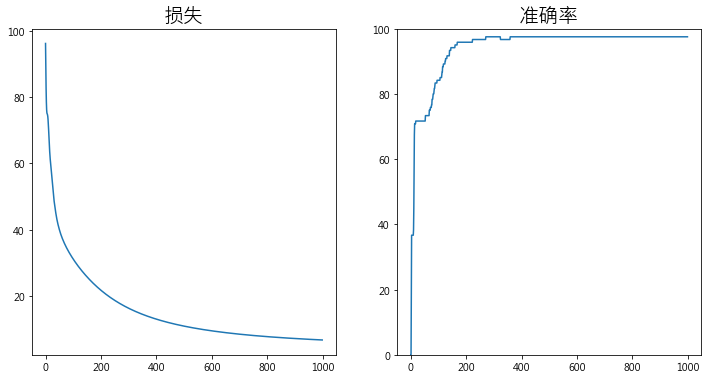

In [11]:
import matplotlib.pyplot as plt

# fix 中文乱码 
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 微软正黑体
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('损失', fontsize=20)
plt.plot(range(0,epochs), losses)

plt.subplot(1,2,2)
plt.title('准确率', fontsize=20)
plt.plot(range(0,epochs), accuracy)
plt.ylim(0,100)
plt.show()

## 模型评估

In [104]:
predict_test = model(X_test)
_, y_pred = torch.max(predict_test, 1)
        
print(f'测试资料准确度: {((y_pred.numpy() == y_test).sum()/y_test.shape[0]):.2f}')

测试资料准确度: 1.00
